### Training of ML algorithms on our Original Dataset

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
data = pd.read_csv('Datasets/8_comps.csv')
data.Price_change = data.Price_change.astype(int)
data

In [ ]:
ones = len(data[data['Price_change']==1])
minus = len(data[data['Price_change']==-1])
zeros = len(data[data['Price_change']==0])

fig, ax = plt.subplots(figsize=(6,6))
plt.pie(x=[ones, minus, zeros], labels=['Upwards','Downwards','Sideways'], shadow=True, autopct='%1.1f%%')
plt.title('Class Distribution', fontsize=18)
plt.show()

data.describe()

In [4]:
# Input features and labels
X = np.array(data[['Positive', 'Negative', 'Neutral']])
y = np.array(data['Price_change'])

# train-test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,  shuffle=True)

In [5]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression(solver='newton-cg',multi_class='multinomial')
logisticRegr.fit(X_train, y_train)

# predict model
# Predict for One Observation
logisticRegr.predict(X_test[0].reshape(1,-1))

# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

0.5228346456692914


In [6]:
from sklearn.metrics import make_scorer,f1_score, accuracy_score,precision_score, recall_score, f1_score
scoring = {'accuracy' : make_scorer(accuracy_score, greater_is_better=True), 
           'f1_macro' : make_scorer(f1_score, average='macro', greater_is_better=True)
           #'precision' : make_scorer(precision_score, zero_division=0),
           #'recall' : make_scorer(recall_score, average='macro'),  }
          }

cv_scores = cross_validate(logisticRegr, X, y, cv=10, scoring=scoring)
accs = cv_scores['test_accuracy'].mean()
print("Mean accs : ",accs)
f1_macros = cv_scores['test_f1_macro'].mean()
print("Mean f1_macro", f1_macros)

Mean accs :  0.5236350108225107
Mean f1_macro 0.3539930774009053


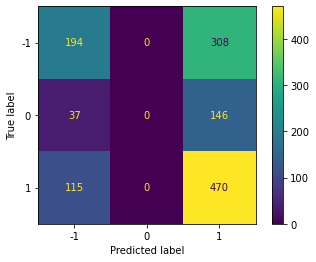

In [7]:
predictions = logisticRegr.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=logisticRegr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                         display_labels=logisticRegr.classes_)
disp.plot()
plt.show()

<AxesSubplot:xlabel='Positive', ylabel='Negative'>

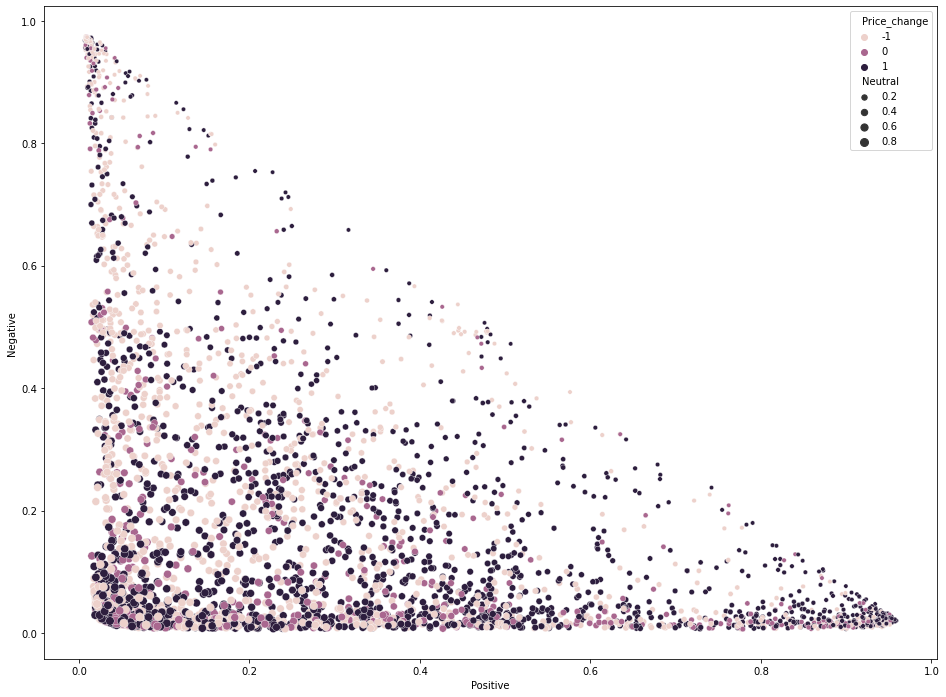

In [8]:
fig , ax = plt.subplots(figsize=(16,12))
sns.scatterplot(data=data, x="Positive", y="Negative", size='Neutral', hue = 'Price_change')

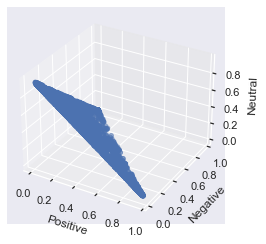

In [9]:
from mpl_toolkits.mplot3d import Axes3D
sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = data['Positive']
y = data['Negative']
z = data['Neutral']

ax.set_xlabel("Positive")
ax.set_ylabel("Negative")
ax.set_zlabel("Neutral")

ax.scatter(x, y, z)

plt.show()

## Nearest Neighbors

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train, y_train)
score = knn.score(X_test, y_test)
score


0.5204724409448819

In [12]:
cv_scores = cross_validate(knn, X, y, cv=5, scoring=scoring)
accs = cv_scores['test_accuracy'].mean()
print("Mean accs : ",accs)
f1_macros = cv_scores['test_f1_macro'].mean()
print("Mean f1_macro", f1_macros)

Mean accs :  nan
Mean f1_macro nan


C:\Users\Konpoul\miniconda3\envs\torch\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Konpoul\miniconda3\envs\torch\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Konpoul\miniconda3\envs\torch\lib\site-packages\sklearn\neighbors\_classification.py", line 198, in fit
    return self._fit(X, y)
  File "C:\Users\Konpoul\miniconda3\envs\torch\lib\site-packages\sklearn\neighbors\_base.py", line 420, in _fit
    check_classification_

## Add Volume as feature

In [19]:
# Input features and labels
X = np.array(data[['Positive', 'Negative', 'Neutral', 'Volume']])
y = np.array(data['Price_change'])

# train-test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,  shuffle=True)

In [22]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression(multi_class='multinomial')
logisticRegr.fit(X_train, y_train)

# predict model
# Predict for One Observation
logisticRegr.predict(X_test[0].reshape(1,-1))

# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

0.47086614173228347


In [21]:
cv_scores = cross_validate(logisticRegr, X, y, cv=6, scoring=scoring)
accs = cv_scores['test_accuracy'].mean()
print("Mean accs : ",accs)
f1_macros = cv_scores['test_f1_macro'].mean()
print("Mean f1_macro", f1_macros)

Mean accs :  0.4659564575729447
Mean f1_macro 0.2119009296379769


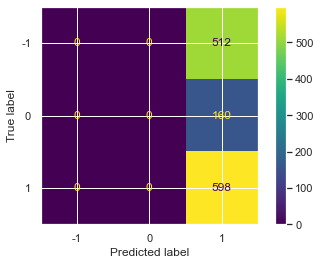

In [23]:
predictions = logisticRegr.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=logisticRegr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                         display_labels=logisticRegr.classes_)
disp.plot()
plt.show()